<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#problem" data-toc-modified-id="problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>problem</a></span></li><li><span><a href="#my-functions" data-toc-modified-id="my-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>my functions</a></span></li><li><span><a href="#equations" data-toc-modified-id="equations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>equations</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Results</a></span></li></ul></div>

# problem

In [1]:
# import library
import subprocess
import sys
import time 


#!/home/selfetni/anaconda3/bin/python3.9.19
#print("PYTHON VERSION: ",sys.version)
# Install pyDOE using pip
subprocess.call(['pip', 'install', 'pyDOE'])

#!pip install pyDOE

#import tensorflow as tf
import datetime, os
#hide tf logs 
os.environ['TF_CPPclea_MIN_LOG_LEVEL'] = '2'  # or any {'0', '1', '2'} 
#0 (default) shows all, 1 to filter out INFO logs, 2 to additionally filter out WARNING logs, and 3 to additionally filter out ERROR logs
import scipy.optimize
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import seaborn as sns 
import codecs, json
import math

# generates same random numbers each time
np.random.seed(1234)
#tf.random.set_seed(1234)
import random
import datetime
import shutil
import json
import glob

#print("TensorFlow version: {}".format(tf.__version__))
import random
import scipy.io as sio


from scipy.interpolate import make_interp_spline


# my functions

# equations

The Gibbs free energy of a multi-phase-field (MPF) system could be seen (from a first approach) as a summation of an interfacial free energy density [$J.m^{-3}$] (also called Grain-Boundary (GB)) $f^{GB}$ and a chemical one $f^{chem}$ as follows.  


$F = \int_\Omega f^{GB} + f^{chem}$

The other contributions could be added added to the MPF free energy forumaltuion, such as the mechanical ($f^{chem}$) and magnetic ones.

$f^{GB} = \sum _{\alpha,\beta=1..N,\alpha > \beta} \frac{4\sigma_{\alpha\beta}}{\eta} \Bigm\{ -\frac{\eta^2}{\pi^2} \nabla\phi_\alpha \cdot \nabla\phi_\beta  + \phi_\alpha \phi_\beta \Bigm\}$

 $\phi_\alpha$ is is the non-conservative phase-field variable corresponding to the phase $\alpha$ (idem for $\beta$), N is the number of components/crysals present in the system, $\sigma_{\alpha\beta}$ is the interfacial energy while $\eta$ is the intrface width.  

For a system with two-phases (binary), the previous expression becomes:

$f^{GB} =  \frac{4\sigma_{}}{\eta} \Bigm\{ -\frac{\eta^2}{\pi^2} \nabla\phi_ \cdot \nabla(1-\phi_)  + \phi (1-\phi ) \Bigm\}$

or simply:

$f^{GB} =  \frac{4\sigma_{}}{\eta} \Bigm\{\phi (1-\phi )+ \frac{\eta^2}{\pi^2} (\nabla\phi) ^{2}  \Bigm\}$

Th temporal evolution of the non-conserved order parameter $\phi$ follows the Allen-Cahn formualtion :

$\frac{\partial \phi}{\partial t}=-L. \frac{\delta F}{\delta \phi}$

where $L$ is the kinetic coefficient of the interface.

in 1D, for a dual interface ($f^{GB}$ is noted hereafter $f^{int}$), when considereing only the interfacial energy $F = \int_\Omega f^{int} dx$, the AC formulation gives:

$\frac{\partial \phi}{\partial t}=-L \Bigm\{ \frac{\partial f^{int}}{\partial \phi} - \nabla \cdot \frac{\partial f^{int}}{\partial (\nabla \phi)} \Bigm\}$

then:

$\frac{\partial \phi}{\partial t} = L \Bigg( \frac{4\sigma}{\eta} \bigg[ (2\phi - 1 )+ 2 \frac{\eta^2}{\pi^2} \nabla^2 \phi \bigg] \Bigg)$

This expression could be also expressed as :

$\dot{\phi}=\mu \sigma\left(\nabla^2 \phi+\frac{\pi^2}{2 \eta^2}(2 \phi-1)\right)$

#### where

where: $\mu=\frac{8\eta L}{\pi^{2}} $

We should note that the previous developements concern only the interface contrubution. However, in order to garantee a moving interface, the non interfacial contributions should be taken into account: 

$f^{dual}=f^{int} + h(\phi) \Delta g$

$\Rightarrow$ The evolution of the order parameter with respect to time is described by this equation: 

$\dot{ \phi}=\mu \left[ \sigma\left(\nabla^2 \phi+\frac{\pi^2}{2 \eta^2}(2\phi-1)\right) +h(\phi) \Delta g \right] $

where the left side describes the interfacial changes while the right one controls the moving of the interface

To solve this equation, we can use the following time-stepping scheme:

$
\dfrac{\phi_{k}^{n+1}-\phi_{k}^{n}}{\Delta t}=
\mu\left[
\sigma\left(\nabla^2\phi_{k}^{n}+\frac{\pi^2}{2 \eta^2}(2\phi_{k}^{n}-1)\right)
+\frac{ \sqrt{\phi_{k}(1-\phi_{k})}}{\eta}   \Delta g
\right]
$

then

$
\phi_{k}^{n+1}=\dfrac{\phi_{k}^{n}+\Delta t\mu\left[
\sigma\left(\nabla^2\phi_{k}^{n}+\frac{\pi^2}{2 \eta^2}(2\phi_{k}^{n}-1)\right)
+\frac{ \pi \sqrt{\phi_{k}(1-\phi_{k})}}{\eta} \Delta g
\right]}{1+\Delta t\mu\sigma\left[k^{2}+\frac{\pi^2}{2 \eta^2}\right]}
$

\begin{equation}
\dot{\phi}_k^{n+1} = \mu \left[ \sigma \left( -(2\pi)^2 k^2 \phi_k^{n+1} + \frac{\pi^2}{2\eta^2}(2\phi_k^n-1) \right) + \frac{\pi \sqrt{\phi_k^n(1-\phi_k^n)}}{\eta} \Delta g \right]
\end{equation}


where $\phi_{k}^{n}$ and $\phi_{k}^{n+1}$ are the Fourier coefficients of $\phi$ at time steps $n$ and $n+1$ respectively, $\Delta t$ is the time step size, $k$ is the wave number, and $\eta$ is a constant parameter.

the resolution could be performed using or not FFT. Hereafter using en Euler scheme:

$\phi^{n+1}_i = \phi^n_i + \Delta t\mu\left[\sigma\left(\nabla^2 \phi^n_i + \frac{\pi^2}{2\eta^2}\left(\phi^n_i-\frac{1}{2}\right)\right) + \frac{\pi \sqrt{\phi^n_i (1-\phi^n_i )}}{\eta} \Delta g\right]$

$\nabla^2 \phi_{i,j} = \frac{\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - 4\phi_{i,j}}{(\Delta x)^2}$

$\phi^{n+1}{i,j} = \phi^n{i,j} + \Delta t\mu\left[\sigma\left(\frac{\phi^n_{i+1,j} + \phi^n_{i-1,j} + \phi^n_{i,j+1} + \phi^n_{i,j-1} - 4\phi^n_{i,j}}{(\Delta x)^2} + \frac{\pi^2}{2\eta^2}\left(\phi^n_{i,j}-\frac{1}{2}\right)\right) + \frac{\pi \sqrt{\phi^n_i (1-\phi^n_i )}}{\eta} \Delta g \right]$

\begin{equation}
\phi_k^{n+1} = \frac{\phi_k^n + \Delta t \cdot \mu \left[ \sigma \left( -(2\pi)^2 k^2 \phi_k^{n+1} + \frac{\pi^2}{2\eta^2}(2\phi_k^n-1) \right) + \frac{\pi \sqrt{\phi_k^n(1-\phi_k^n)}}{\eta} \Delta g \right]}{1 + \Delta t \cdot \mu \cdot \sigma \cdot (2\pi)^2 k^2}
\end{equation}

### Energy controlled problem

(1) In order to guarantee a moving interface, the non-interfacial contributions should be taken into account:
$f^{dual} = f^{int} + h(\phi) \Delta g $ 
where \( h(\phi) \) is a coupling function between 0 and 1 monotonous in \( \phi \) in the range between 0 and 1, chosen in order to ensure a traveling wave solution. \( \Delta g \) corresponds to the non-interfacial free energy densities.

(2) The global energy:
$ F = \int_\Omega f^{dual} $ where $f^{dual}=f^{int} + h(\phi) \Delta g$

(3) $ f^{int} =  \frac{4\sigma}{\eta} \left\{ \phi (1-\phi) + \frac{\eta^2}{\pi^2} (\nabla\phi)^2 \right\} $

(4) The evolution of the order parameter/phase field with respect to time is described by this equation:
$\dot{\phi} = \mu \left[ \sigma \left(\nabla^2 \phi+\frac{\pi^2}{2 \eta^2}(2\phi-1)\right) + \frac{\pi \sqrt{\phi_{}(1-\phi_{})}}{\eta} \Delta g \right] $

(5) The temporal evolution of the non-conserved order parameter \( \phi \) follows the Allen-Cahn formulation:
$ \frac{\partial \phi}{\partial t} = -L \frac{\delta F}{\delta \phi} $

If we consider that \Delta g is constant and h depend on phi (h=dh_dphi * phi) that the expression for the energy evolution of the system at each time is given by:


$ \frac{dF}{dt} = \int_{\Omega} \left\{ \frac{4\sigma}{\eta} \left[ \frac{d\phi}{dt} (1-2\phi) + \frac{\eta^2}{\pi^2} 2 (\nabla\phi) \cdot (\nabla \frac{d\phi}{dt}) \right] + \frac{dh}{d\phi} \frac{d\phi}{dt}\Delta g  \right\} $
 

$ \frac{dh}{d\phi} = \frac{8}{\pi} \sqrt{\phi(1-\phi)}  $


##### We can compute the energy residual otherwise (to check)

$ \frac{dF}{dt} = -\frac{1}{L} \dot{\phi} ^{2} $ 

In [2]:
def prepar_fft(Nx,dx,ax,bx,Ny,dy,ay,by,opt):
    
    if opt=="1d":
        kx=np.zeros(Nx)
        ky=np.zeros(Nx)
        k2=np.zeros(Nx)
        k4=np.zeros(Nx)
    
        if (Nx % 2) == 1 :          # = the number if odd remainers is zero
            kx[0:int((Nx-1)/2.0+1)] = np.arange(0, int((Nx-1)/2.0+1), 1)*2*np.pi/(bx-ax)
            kx[int((Nx-1)/2.0+1):]  = np.arange(int(-(Nx+1)/2.0 +1), 0, 1)*2*np.pi/(bx-ax)
        else :                      # = even number remainder = 1
            kx[0:int(Nx/2.0)] = np.arange(0, int(Nx/2.0), 1)*2*np.pi/(bx-ax)
            kx[int(Nx/2+1):] = np.arange(int(-Nx/2.0 + 1), 0, 1)*2*np.pi/(bx-ax)#*step#*step        
        k2=kx**2
    
    if opt=="2d":
        kx=np.zeros((Nx,Ny))
        ky=np.zeros((Nx,Ny))
        
        k2=np.zeros((Nx,Ny))
        k4=np.zeros((Nx,Ny))
    
        if (Nx % 2) == 1 :          # = even number remainers is one
            for i in range(Nx):
                kx[i][0:int((Ny-1)/2.0+1)] = np.arange(0, int((Ny-1)/2.0+1), 1)*2*np.pi/(bx-ax)#(Nx*dx)#
                kx[i][int((Ny-1)/2.0+1):]  = np.arange(int(-(Ny+1)/2.0 +1), 0, 1)*2*np.pi/(bx-ax)#(Nx*dx)#(bx-ax)
            for j in range(Ny):
                ky[j][0:int((Nx-1)/2.0+1)] = np.arange(0, int((Ny-1)/2.0+1), 1)*2*np.pi/(by-ay)#(Nx*dx)#(by-ay)
                ky[j][int((Nx-1)/2.0+1):]  = np.arange(int(-(Ny+1)/2.0 +1), 0, 1)*2*np.pi/(by-ay)#(Nx*dx)#(by-ay)#
        else :                      # = odd number remainder = 0
            for i in range(Nx):
                kx[i][0:int(Nx/2.0)] = np.arange(0, int(Nx/2.0), 1)*2*np.pi/(bx-ax)#(Nx*dx)#(bx-ax)
                kx[i][int(Nx/2+1):] = np.arange(int(-Nx/2.0 + 1), 0, 1)*2*np.pi/(bx-ax)#(Nx*dx)#(bx-ax)#*step#*step    
            for j in range(Ny):
                ky[j][0:int(Nx/2.0)] = np.arange(0, int(Ny/2.0), 1)*2*np.pi/(by-ay)#(Nx*dx)#(by-ay)
                ky[j][int(Nx/2+1):] = np.arange(int(-Ny/2.0 + 1), 0, 1)*2*np.pi/(by-ay)#(Nx*dx)#(by-ay)#*step#*step
    
        for i in range(Nx):
            for j in range(Ny):
                k2[i][j]=kx[0][i]**2+ky[0][j]**2            # = Laplacian in Fourier space
    
        #k2=kx**2+ky**2
    
    k4=k2**2
    
    return kx,ky,k2,k4

###############################################
def init_micro_cir_old(N,leng,r,ox,oy,oz):
    #c      =np.zeros((N**2))
    eta       = np.ones((N,N))*(-1)
    xcor_l   =np.arange(0,leng+leng/(N-1),leng/(N-1))
    ycor_l   =np.arange(0,leng+leng/(N-1),leng/(N-1))
    zcor_l   =np.zeros((N**2))
    
    xcor,ycor = np.meshgrid(xcor_l,ycor_l)
    #xcor=np.resize(xcor_l,(N,N))
    #ycor=np.resize(ycor_l,(N,N))
    zcor=zcor_l
    for i_coorx in range(N):
        for i_coory in range(N):
            for i_cir in range(len(r)): 
                norm=np.sqrt((ox[i_cir]-xcor[i_coorx][i_coory])**2
                    +(oy[i_cir]-ycor[i_coorx][i_coory])**2)
                    #+(oz[i_cir]-zcor[i_coor])**2)
                if norm<=r[i_cir]:
                    eta[i_coorx][i_coory]+=2
    return xcor,ycor,eta,xcor_l,ycor_l
# initialize microstructure
###############################################
def get_phi_values(r,R0,i_cir,eta):
    phi_inf = 0.0
    phi_mid = 0.5 - 0.5*np.sin(np.pi*(r-R0[i_cir])/eta)
    phi_sup = 1.0
    
    inf = r < R0[i_cir] - eta/2
    mid = np.logical_and(r >= R0[i_cir] - eta/2, r <= R0[i_cir] + eta/2)
    sup = r > R0[i_cir] + eta/2

    X_ini_all_values = np.where(inf, phi_sup, np.where(mid, phi_mid, phi_inf))
    return X_ini_all_values   
###############################################
def init_micro_cir(ox,oy,oz,R0,Nx,Ny,x,y,lb,ub,eta):
    all_phi     = np.zeros((Nx,Ny))
    X_ini_all=[]
    xcor_linspace  = np.linspace(x.min(),x.max(),Nx)
    ycor_linspace  = np.linspace(y.min(),y.max(),Ny)
    zcor_linspace  = np.zeros((Nx**2))   

    #xcor,ycor = np.meshgrid(xcor_linspace,ycor_linspace)
    for i_cir in range(len(R0)): 
        x_center=ox[i_cir]
        y_center=oy[i_cir]
        for i_coory in range(Ny):
            for i_coorx in range(Nx):
                    r=np.sqrt((x_center-xcor_linspace[i_coorx])**2
                        +(y_center-ycor_linspace[i_coory])**2)
                        #+(oz[i_cir]-zcor[i_coor])**2)
                    # phi(x,y,z) value ==> cases
                    phi=get_phi_values(r,R0,i_cir,eta)
                    if phi>0:
                        all_phi[i_coorx][i_coory]=phi
                        # X_ini_all are all points inside the cercle R0
                        X_ini_all.append([i_coorx,i_coory])
    X_ini_all=np.asarray(X_ini_all)
    X_ini_square = np.zeros((Nx, Ny))
    #plt.scatter(X_ini_all[:, 0], X_ini_all[:, 1])
    #plt.show()
    X_ini_square[X_ini_all[:, 0], X_ini_all[:, 1]] = 1

    # set lb and ub values for each feature
    #plt.imshow(X_ini_square)
    #plt.show()
    plt.imshow(all_phi)
    plt.show()
    return all_phi, X_ini_square #np.asarray(X_ini_all)




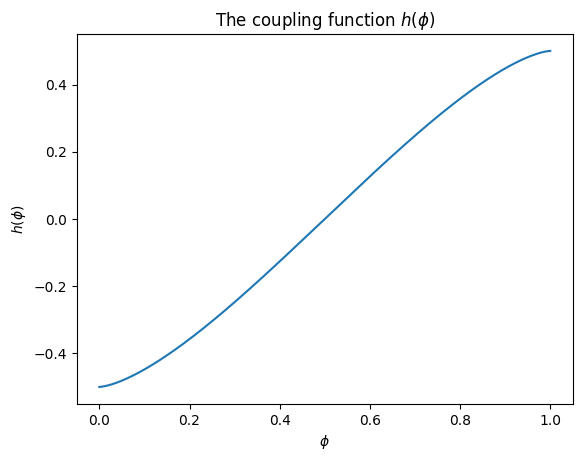

In [3]:

# Define the function h(phi)
def h(phi):
    return (1/np.pi) * ((4*phi-2) * np.sqrt(phi*(1-phi)) + np.arcsin(2*phi-1))

# Create an array of phi values between 0 and 1
phi_values = np.linspace(0, 1, 1000)

# Evaluate the function h(phi) for the phi values
h_values = h(phi_values)

# Plot h(phi) as a function of phi
plt.plot(phi_values, h_values)
plt.xlabel('$\phi$')
plt.ylabel('$h(\phi)$')
plt.title('The coupling function $h(\phi)$')
plt.show()


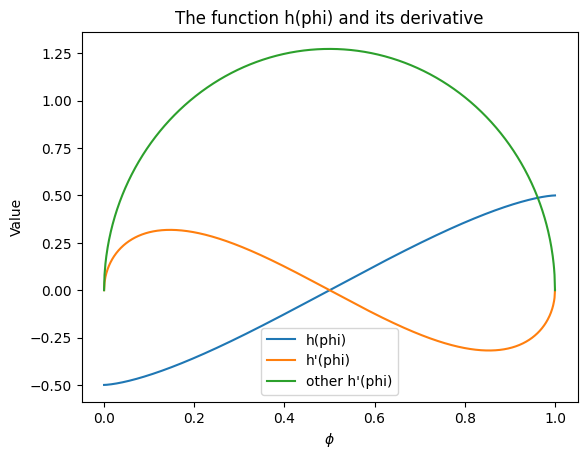

In [4]:

# Define the function h(phi)
def h(phi):
    return (1/np.pi) * ((4*phi-2) * np.sqrt(phi*(1-phi)) + np.arcsin(2*phi-1))

# Define the derivative of h(phi)
def h_derivative(phi):
    return (1/np.pi) * (4 - 8*phi) * np.sqrt(phi*(1-phi))

# Create an array of phi values between 0 and 1
phi_values = np.linspace(0, 1, 1000)

# Evaluate the function h(phi) for the phi values
h_values = h(phi_values)

# Evaluate the derivative of h(phi) for the phi values
h_derivative_values = h_derivative(phi_values)

# Plot h(phi) and its derivative on the same plot
plt.plot(phi_values, h_values, label='h(phi)')
plt.plot(phi_values, h_derivative_values, label="h'(phi)")
plt.plot(phi_values, (8/np.pi)* np.sqrt(phi_values*(1-phi_values)) , label="other h'(phi)")
plt.xlabel('$\phi$')
plt.ylabel('Value')
plt.title('The function h(phi) and its derivative')
plt.legend()
plt.show()


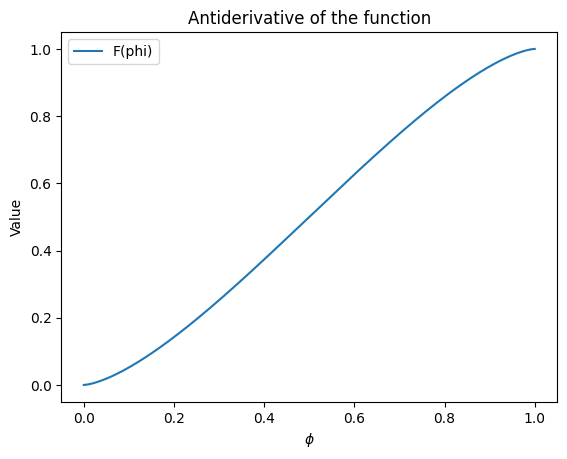

In [5]:
from scipy.integrate import quad

# Define the function f(phi) to integrate
def f(phi):
    return (8/np.pi) * np.sqrt(phi*(1-phi))

# Calculate the antiderivative F(phi) using quad integration
def F(phi):
    return quad(f, 0, phi)[0]

# Create an array of phi values between 0 and 1
phi_values = np.linspace(0, 1, 1000)

# Evaluate the antiderivative F(phi) for the phi values
F_values = np.vectorize(F)(phi_values)

# Plot the antiderivative F(phi)
plt.plot(phi_values, F_values, label='F(phi)')
plt.xlabel('$\phi$')
plt.ylabel('Value')
plt.title('Antiderivative of the function')
plt.legend()
plt.show()


#### Energy functions

In [6]:
def free_energy(eta, phi, sigma, h, delta_g): 
    # Calculate the gradient of phi using central differences
    phi_x, phi_y = np.gradient(phi, axis=(0, 1))
    gradient_phi_squared = phi_x**2 + phi_y**2
        
    # Interfacial energy contribution
    f_int = 4 * sigma / eta * (phi * (1 - phi) + (eta**2 / np.pi**2) * gradient_phi_squared)
    
    # Non-interfacial contribution
    f_non_int = h(phi) * delta_g
    
    # Total free energy
    f = f_int + f_non_int
    
    return np.sum(f), np.sum(f_int), np.sum(f_non_int)


"""
def dphi_dt(phi, mu, sigma, eta, delta_g):
    phi_x = np.gradient(phi, axis=0)
    phi_y = np.gradient(phi, axis=1)
    lap_phi = np.gradient(phi_x, axis=0) + np.gradient(phi_y, axis=1)
    phi_term = np.pi**2 / (2 * eta**2) * (2 * phi - 1)
    
    return mu * (sigma * (lap_phi + phi_term) + dh_dphi(phi,eta) * delta_g)
"""


def energy_derivative(phi, mu, sigma, eta, delta_g,h): 
    phi_dot = dphi_dt(phi, mu, sigma, eta, delta_g)
    grad_phi = np.gradient(phi, axis=(0, 1))
    grad_phi_dot = np.gradient(phi_dot, axis=(0, 1))
    
    term_1_1 = (4 * sigma / eta) * phi_dot * (1 - 2 * phi)
    #term_1_2 = (4 * sigma / eta) * (eta**2 / np.pi**2) * 2 *  (np.asarray(grad_phi) * np.asarray(grad_phi_dot)).sum()  
    term_1_2 = (4 * sigma / eta) * (eta**2 / np.pi**2) * 2 * np.dot(np.asarray(grad_phi).flatten(), np.asarray(grad_phi_dot).flatten())

    term_2 =dh_dphi(phi,eta) * phi_dot * delta_g
    
    energy_deriv = np.asarray(term_1_1).sum() + term_1_2+ np.asarray(term_2).sum()
    
    return energy_deriv




def compute_residual(eta, phi, sigma, h, delta_g, mu, dx, dy, dF_dt):
    energy_deriv = energy_derivative(phi, mu, sigma, eta, delta_g,h)
    
    # Compute the residual as the absolute difference between the right-hand side and the global energy derivative
    
    residual = np.abs(dF_dt - energy_deriv)
    print("here: ", dF_dt ,energy_deriv)
    
    return residual


### Phase-Field Resolution

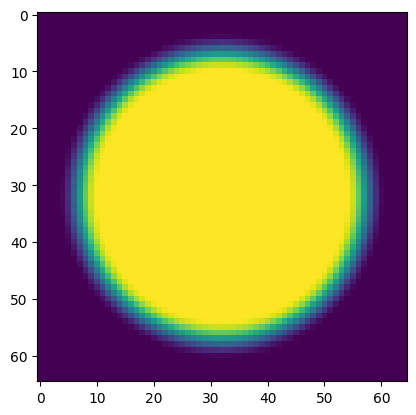

In [7]:
Nx=65
Ny=65
Nt=1000
# Define the domain bounds
lb = np.array([0, 0,0])
ub = np.array([1, 1,1]) #np.array([Nx, Ny,Nt])
dx = (ub[0] - lb[0]) / (Nx - 1)
dy = (ub[1] - lb[1]) / (Ny - 1)
dt = (ub[1] - lb[1]) / (Nt - 1)
eta=7*dx

sigma=1
mu=1e-3
delta_g= -250 #-250
eta=7*dx

T=eta**2 /(sigma*mu)
# simulation grid
lb = np.array([0, 0,0])
ub = np.array([Nx*dx, Ny*dy,Nt*dt]) 
x = np.linspace(lb[0], ub[0], Nx)
y = np.linspace(lb[1], ub[1], Ny)
t= np.linspace(lb[2], ub[2], Nt) 


nstep=Nt
nprint=int(Nt/10)

# time parameters and printing

dtime_s   = 1/Nt          # = normalized time [-] original 0.04
t_s       = 0              # = initial time step       

ask_step = np.arange(0,nstep+1,nprint) 

#nstep=np.max(ask_step)


# microstructure initialization

R0=np.array([0.4])  #  radius 
X_center=np.array([Nx*dx/2])
Y_center=np.array([Ny*dx/2])
Z_center=np.array([0. ])#,.]

phi_0, X_ini_all=init_micro_cir(X_center,Y_center, Z_center,R0,Nx,Ny,x,y,lb,ub,eta)


In [8]:
dx,dy,dt, nstep, eta,mu, phi_0.shape

(0.015625, 0.015625, 0.001001001001001001, 1000, 0.109375, 0.001, (65, 65))

(2, 65, 65)


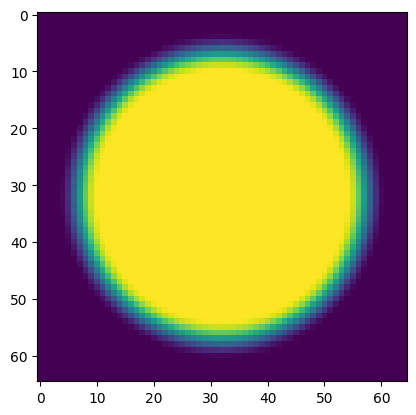

In [9]:
all_phases =np.asarray([phi_0,1-phi_0])
print(all_phases.shape)
plt.imshow(all_phases[0])

In [10]:
Phi = np.copy(all_phases)


In [11]:
all_phases.shape, all_interfaces.shape

NameError: name 'all_interfaces' is not defined

In [17]:
Initilization_Data = {'all_phases': all_phases,\
    'all_interfaces': all_interfaces}
np.savez('Initilization_Data_dual.npz', **Initilization_Data)

In [89]:
# Define a class for storing phase information and handling operations on phases
class FieldEntry:
    def __init__(self, indexA, indexB, value, value2=0.0):
        self.indexA = indexA
        self.indexB = indexB
        self.value = value
        self.value2 = value2

class Node:
    def __init__(self):
        self.Fields = []

    def add_asym(self, n, m, value):
        for entry in self.Fields:
            if (entry.indexA == n and entry.indexB == m) or (entry.indexA == m and entry.indexB == n):
                entry.value += value
                return

        # If no matching entry is found, create a new one
        new_entry = FieldEntry(n, m, value)
        self.Fields.append(new_entry)




def Sigma_(phi_alpha, phi_beta, Sigma_ab):
    # Calculate the interface energy based on the given parameters
    #diff_phi = phi_beta - phi_alpha
    interface_energy = Sigma_ab #* (diff_phi ** 2)

    return interface_energy

def h_term(phi_alpha,phi_beta, eta):
    phi_alpha=np.clip(phi_alpha, 0, 1)
    phi_beta=np.clip(phi_beta, 0, 1)
    square_root_term = np.sqrt(phi_alpha * phi_beta)
    return np.pi / eta * square_root_term

def I_phi(lap_phi_alpha, phi_alpha, Prefactor):
    return (lap_phi_alpha +  phi_alpha)


def Laplacian_(phi, dx, dy, boundary_condition='neumann'):
    if boundary_condition == 'periodic':
        laplacian = (np.roll(phi, 1, axis=0) + np.roll(phi, -1, axis=0) +
                     np.roll(phi, 1, axis=1) + np.roll(phi, -1, axis=1) - 4 * phi) / (dx * dy)
        
    elif boundary_condition == 'dirichlet':
        # Dirichlet boundary condition: phi is held constant at the boundary.
        laplacian = np.zeros_like(phi)
        laplacian[1:-1, 1:-1] = (phi[:-2, 1:-1] + phi[2:, 1:-1] +
                                 phi[1:-1, :-2] + phi[1:-1, 2:] - 4 * phi[1:-1, 1:-1]) / (dx * dy)
    elif boundary_condition == 'neumann':
        # Neumann boundary condition: derivative of phi is zero at the boundary.
        laplacian = np.zeros_like(phi)
        laplacian[1:-1, 1:-1] = (phi[:-2, 1:-1] + phi[2:, 1:-1] +
                                 phi[1:-1, :-2] + phi[1:-1, 2:] - 4 * phi[1:-1, 1:-1]) / (dx * dy)
        # Neumann boundary conditions at the edges
        laplacian[0, 1:-1] = (phi[1, 1:-1] + phi[0, :-2] + phi[0, 2:] - 3 * phi[0, 1:-1]) / (dx * dy)
        laplacian[-1, 1:-1] = (phi[-2, 1:-1] + phi[-1, :-2] + phi[-1, 2:] - 3 * phi[-1, 1:-1]) / (dx * dy)
        laplacian[1:-1, 0] = (phi[:-2, 0] + phi[2:, 0] + phi[1:-1, 1] - 3 * phi[1:-1, 0]) / (dx * dy)
        laplacian[1:-1, -1] = (phi[:-2, -1] + phi[2:, -1] + phi[1:-1, -2] - 3 * phi[1:-1, -1]) / (dx * dy)
    else:
        raise ValueError("Invalid boundary_condition. Use 'periodic', 'dirichlet', or 'neumann'.")
    
    return laplacian

def Laplacian(phi, dx, dy):
    laplacian = (np.roll(phi, 1, axis=0) + np.roll(phi, -1, axis=0) +
                 np.roll(phi, 1, axis=1) + np.roll(phi, -1, axis=1) - 4 * phi) / (dx*dy)
    return laplacian

def update_phi_no_nucleation(phi, sigma, Mu):
    phi_new=np.copy(phi)
    Prefactor=np.pi**2 / eta**2
    correction = 8*eta/np.pi**2 # 1.0 + 2.0/eta**2
    num_phases = phi.shape[0]

    for alpha in range(num_phases):
        dPsi_dt=np.zeros_like(phi_new[alpha] )
        lap_phi_alpha = Laplacian(phi[alpha],dx,dy)
        I_alpha = I_phi(lap_phi_alpha, phi[alpha], Prefactor)
        for beta in range(num_phases):
            if beta != alpha:
                lap_phi_beta = Laplacian(phi[beta],dx,dy)
                I_beta = I_phi(lap_phi_beta, phi[beta],Prefactor)
                sigma_ab = Sigma_(phi[alpha], phi[beta], sigma)
                dPsi_dt +=   (I_alpha - I_beta) +np.pi**2/(4*eta) *delta_g
                """
                if num_phases>2:
                    for gamma in range(num_phases):
                        if gamma != alpha and gamma != beta:
                            sigma_bg = Sigma_(phi[beta], phi[gamma], sigma)
                            sigma_ag = Sigma_(phi[alpha], phi[gamma], sigma)
                            lap_phi_gamma = Laplacian(phi[gamma],dx,dy)
                            I_gamma = I_phi(lap_phi_gamma, phi[gamma], np.pi**2 / eta**2)
                            dPsi_dt -= (sigma_bg - sigma_ag) * (I_gamma)
                """                

        phi[alpha] +=   dt *(mu/num_phases) * dPsi_dt

        phi[alpha] = np.clip( phi[alpha], 0, 1)
                
    return phi        
                
# Given input parameters
num_phases = len(all_phases)

Nx=65
Ny=65
Nt=1000

dx = 1e-6#(ub[0] - lb[0]) / (Nx - 1)
dy = dx#(ub[1] - lb[1]) / (Ny - 1)
dt =1e-4 #(ub[2] - lb[2]) / (Nt- 1)
eta=7*dx
sigma=0.24
mu=4e-9
T=eta**2 /(sigma*mu)
# simulation grid
lb = np.array([0, 0,0])
ub = np.array([Nx*dx, Ny*dy,Nt*dt]) 
x = np.linspace(lb[0], ub[0], Nx) /eta
y = np.linspace(lb[1], ub[1], Ny)/eta
t= np.linspace(lb[2], ub[2], Nt) /T
dt=dt/T


delta_g= 0



# Initialize phi with random values
Phi = np.copy(all_phases)
interactions = {(alpha, beta): 1 for alpha in range(len(all_phases)) for beta in range(len(all_phases)) if alpha != beta}
for step in range(Nt):
    Phi=update_phi_no_nucleation(Phi, sigma, mu)
    #Phi,_=update_phi(all_phases, mu, sigma, eta, delta_g, dt, dx)
    if (step + 1) % 100 == 0:
        print(f"Step {step + 1} completed")




print("Final phi:", Phi.shape)


Step 100 completed
Step 200 completed
Step 300 completed
Step 400 completed
Step 500 completed
Step 600 completed
Step 700 completed
Step 800 completed
Step 900 completed
Step 1000 completed
Final phi: (2, 65, 65)


In [37]:
Nx,Ny,mu, sigma, eta, delta_g, dt, Nt

(65, 65, 4e-09, 0.24, 7e-06, 0, 0.0001, 1000)

In [34]:
eta

0.109375

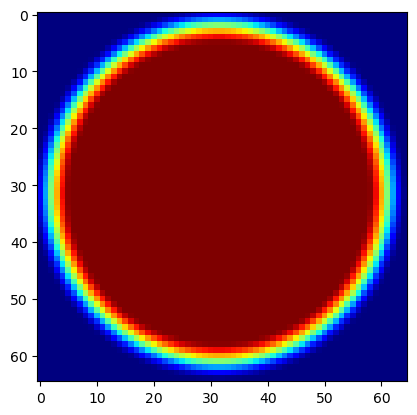

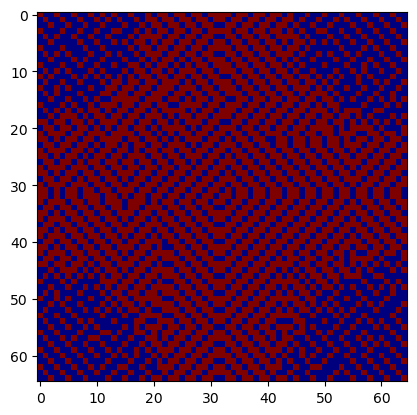

In [90]:
plt.imshow(all_phases[0], cmap=plt.get_cmap('jet'), interpolation='none', vmin=0, vmax=1)
plt.show()
plt.imshow(Phi[0], cmap=plt.get_cmap('jet'), interpolation='none', vmin=0, vmax=1)

In [42]:
# start simulation
import time 
t_start = time.time() 


# set fourier coefficient 
"""
kx,ky,k2,k4=prepar_fft(Nx,   #Nx,dx,ax,bx,Ny,dy,ay,by,opt
dx_s,   # dx_s
0,
leng_s, #leng_s
Nx,
dx_s,
0,
leng_s,
"2d")
"""
# ----------------------------------------------------
def free_energy(eta, phi, sigma, h, delta_g): 
    # Calculate the gradient of phi using central differences
    phi_x, phi_y = np.gradient(phi, axis=(0, 1))
    gradient_phi_squared = phi_x**2 + phi_y**2
        
    # Interfacial energy contribution
    f_int = 4 * sigma / eta * (phi * (1 - phi) + (eta**2 / np.pi**2) * gradient_phi_squared)
    
    # Non-interfacial contribution
    f_non_int = - h(phi) * delta_g
    
    # Total free energy
    f = f_int + f_non_int
    
    return np.sum(f), np.sum(f_int), np.sum(f_non_int)
# ----------------------------------------------------
def dh_dphi(phi, eta):
    return (8/np.pi) * np.sqrt(phi*(1-phi))
# ----------------------------------------------------
# Define the function h(phi)
def h(phi):
    return (1/np.pi) * ((4*phi-2) * np.sqrt(phi*(1-phi)) + np.arcsin(2*phi-1))
"""
# ----------------------------------------------------
def compute_phi_dot(phi, mu, sigma, eta, delta_g, dx):
    phi_dot = np.zeros_like(phi)
    # Calculate the Laplacian term using np.roll for efficient shifting
    laplacian = (np.roll(phi, 1, axis=0) + np.roll(phi, -1, axis=0) +
                 np.roll(phi, 1, axis=1) + np.roll(phi, -1, axis=1) - 4 * phi) / (dx**2)
    for i in range(1, phi.shape[0]-1):
        for j in range(1, phi.shape[1]-1):
            phi_dot[i,j] = mu * (sigma * (laplacian[i,j] + np.pi**2 / (2*eta**2) * (2*phi[i,j] - 1)) -
                                 np.pi * np.sqrt(phi[i,j] * (1 - phi[i,j])) / eta * delta_g)
    
    return phi_dot

# ----------------------------------------------------
#@jit(nopython=True)
"""
def update_phi(phi, mu, sigma, eta, delta_g, dt, dx):
    phi_new = np.zeros_like(phi)
    
    # Calculate the Laplacian term using finite difference approximations
    laplacian = (np.roll(phi, 1, axis=0) + np.roll(phi, -1, axis=0) +
                 np.roll(phi, 1, axis=1) + np.roll(phi, -1, axis=1) - 4 * phi) / (dx**2)

    # Define the function h(phi)
    def h_term(phi, eta):
        square_root_term = np.sqrt(phi * (1 - phi))
        return np.pi / eta * square_root_term

    # Update the values of phi
    phi_new = phi + dt * mu * (sigma * (laplacian + np.pi**2 / (2 * eta**2) * (2 * phi - 1)) +
                              h_term(phi, eta) * delta_g)

    return phi_new


def compute_phi_dot(phi, mu, sigma, eta, delta_g, dx):
    phi_dot = np.zeros_like(phi)

    # Calculate the gradients using finite difference approximations
    grad_x = (phi[2:, 1:-1] - phi[:-2, 1:-1]) / (2 * dx)
    grad_y = (phi[1:-1, 2:] - phi[1:-1, :-2]) / (2 * dx)

    # Calculate the Laplacian term using finite difference approximations
    laplacian = (phi[:-2, 1:-1] + phi[2:, 1:-1] +
                 phi[1:-1, :-2] + phi[1:-1, 2:] - 4 * phi[1:-1, 1:-1]) / (dx**2)

    for i in range(1, phi.shape[0]-1):
        for j in range(1, phi.shape[1]-1):
            phi_dot[i, j] =   (laplacian[i-1, j-1] + np.pi**2  * (2 * phi[i, j] - 1)) 
            #np.pi * np.sqrt(phi[i, j] * (1 - phi[i, j])) / eta * delta_g)

    return phi_dot


# ----------------------------------------------------
def phi_term(phi, mu, sigma, eta, delta_g): 
    phi_dot = compute_phi_dot(phi, mu, sigma, eta, delta_g, dx)
    grad_phi = np.gradient(phi, axis=(0, 1))
    grad_phi_dot = np.gradient(phi_dot, axis=(0, 1))
    
    term_1_1 = (4 * sigma / eta) * phi_dot * (1 - 2 * phi)
    term_1_2 = (4 * sigma / eta) * (eta**2 / np.pi**2) * 2 *  (np.asarray(grad_phi) * np.asarray(grad_phi_dot))
    #term_1_2 =  (4 * sigma / eta) * (eta**2 / np.pi**2) * 2 * np.dot(np.asarray(grad_phi), np.asarray(grad_phi_dot)).sum()

    term_2 = -dh_dphi(phi,eta) * phi_dot * delta_g
    
    phi_term_ = np.asarray(term_1_1).sum() + term_1_2.sum() + np.asarray(term_2).sum()
    return phi_term_



res =[]
out_phi_vs_t=[]        # to store value of order parameter 
out_area_vs_t=[]
out_energy=[]
out_res=[]
out_time=[]
t=0

#fileOut_path="out_file_"+str(Nx)+".txt"

# initialization
phi=all_phases[0]

for istep in range(Nt): # nstep
    
    # Fourier transform
    #f=free_energy(phi)                    # =  compute free energy
    #phik=np.fft.fft2(phi)                 # = 2d ftt of eta
    #fk=np.fft.fft2(f)                     # = 2d ftt of f
        
    #phik=  phi + dt*mu*sigma*(laplacian*phi + pi2_over_2eta2*(phi-0.5) + h_phi_delta_g) / denom# = solve equation in fourier space
    #phik=np.real(np.fft.ifft2(phik))       # = get the result in real space 
    phi = update_phi(phi, mu, sigma, eta, delta_g, dt, dx)
    phi = np.clip(phi, 0, 1)
    

    energy,f_int,f_non_int=free_energy(eta, phi,sigma, h, delta_g)
    out_energy.append([energy,f_int , f_non_int])
    out_time.append(t)
    array_F=np.asarray(out_energy)[:,0]
    
    
    if any(istep==ask_step):
        area_vs_t=(len(phi[phi>0]))
        out_area_vs_t.append([t,area_vs_t])
        out_phi_vs_t.append([t,phi])
        #print("istep: {:}, time: {:.2f}, Area: {:.3f}\n".format(istep, t, area_vs_t))


          
    if istep>2:
        x = out_time # x-coordinates for spline interpolation
        y = np.asarray(out_energy)[:, 0] # y-coordinates for spline interpolation
        #dx = x[1] - x[0]  # Assuming uniform spacing
        #dy = np.diff(y)
        #print(x,y)
        # Generate smooth spline curve
        spl = make_interp_spline(x, y)
        #derivative = spl.derivative(nu=1)(t)

        
        #derivative = np.gradient(np.diff(y), x[1] - x[0] )[-1]

        derivative=(np.asarray(out_energy)[:, 0][-1]-np.asarray(out_energy)[:, 0][-3]) /(2*dt)
        
        phi_dot = compute_phi_dot(phi, mu, sigma, eta, delta_g, dx)
        phi_dot_norm = np.linalg.norm(phi_dot,ord=2)
        #print(derivative,phi_dot_norm)
        
        phi_term_=phi_term(phi, mu, sigma, eta, delta_g)
        energy_residual = np.abs(np.abs(derivative) - np.abs(phi_term_))
        phi_sum=phi.sum()/Nx**2
        
        #print("istep: {:2f}, derivative: {:.3e}, phi_term: {:.3e}, phi_sum: {:.3e}\n".format(t, derivative, phi_term_,phi_sum))
        #print((y[-1]-y[-2])/dt)
        
        #print("istep {},  Energy derivative {:.2e}, phi_dot term {:.2e}, Energy residual {:.2e}\n".format(istep, derivative, phi_term, energy_residual))
        out_res.append([energy_residual,derivative,phi_term_])
    
        #print("Derivative: {:.2e}".format(derivative))
        #print("phi_dot_norm^2: {:.2e}".format(phi_term))
        #print("Residual: {:.2e}".format(energy_residual))
        
        #plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        #plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e'))
        """
        plt.plot(x, y, "k", label=r"$Enery$", linestyle='--')
        plt.plot(x, spl(x), "g", label="Spline Curve")

        # Plot tangent line at the specified time
        tangent_x = np.array([t-dt, t+dt])  # X-coordinates for tangent line
        tangent_y = spl(t) + derivative * (tangent_x - t)  # Y-coordinates for tangent line
        plt.plot(tangent_x, tangent_y, "r", label="Tangent Line")
        #tangent_x = np.array([time-1, time+1])  # X-coordinates for tangent line
        #tangent_y = spl(time) + derivative * (tangent_x - time)  # Y-coordinates for tangent line

        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Energy", fontsize=12)
        plt.title('Energy vs. Time', fontsize=12)
        plt.legend()

        plt.show()
        """
        
        #time.sleep(100)
        
    
    t+=dt
        

t_end = time.time() 



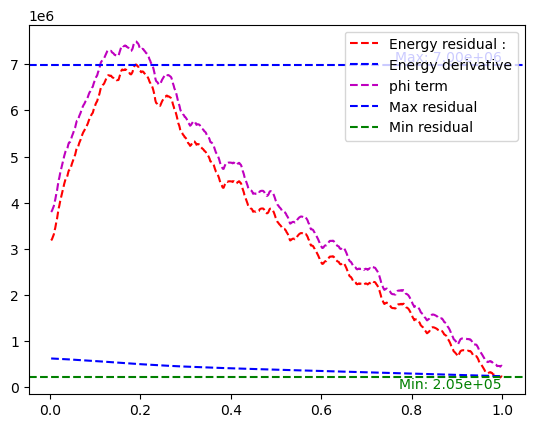

In [29]:
plt.plot(out_time[3:], np.asarray(out_res)[:, 0] , "r--", label="Energy residual : ")
plt.plot(out_time[3:],-np.asarray(out_res)[:, 1] , "b--", label="Energy derivative")
plt.plot(out_time[3:],np.asarray(out_res)[:, 2] , "m--", label="phi term")
residual = np.abs(np.asarray(out_res)[:, 0])
max_residual = np.max(residual)
min_residual = np.min(residual)
plt.axhline(y=max_residual, color="b", linestyle="--", label="Max residual")
plt.axhline(y=min_residual, color="g", linestyle="--", label="Min residual")
plt.text(out_time[-1], max_residual, f"Max: {max_residual:.2e}", color="b", ha="right", va="bottom")
plt.text(out_time[-1], min_residual, f"Min: {min_residual:.2e}", color="g", ha="right", va="top")
plt.legend()

plt.show()

# Results

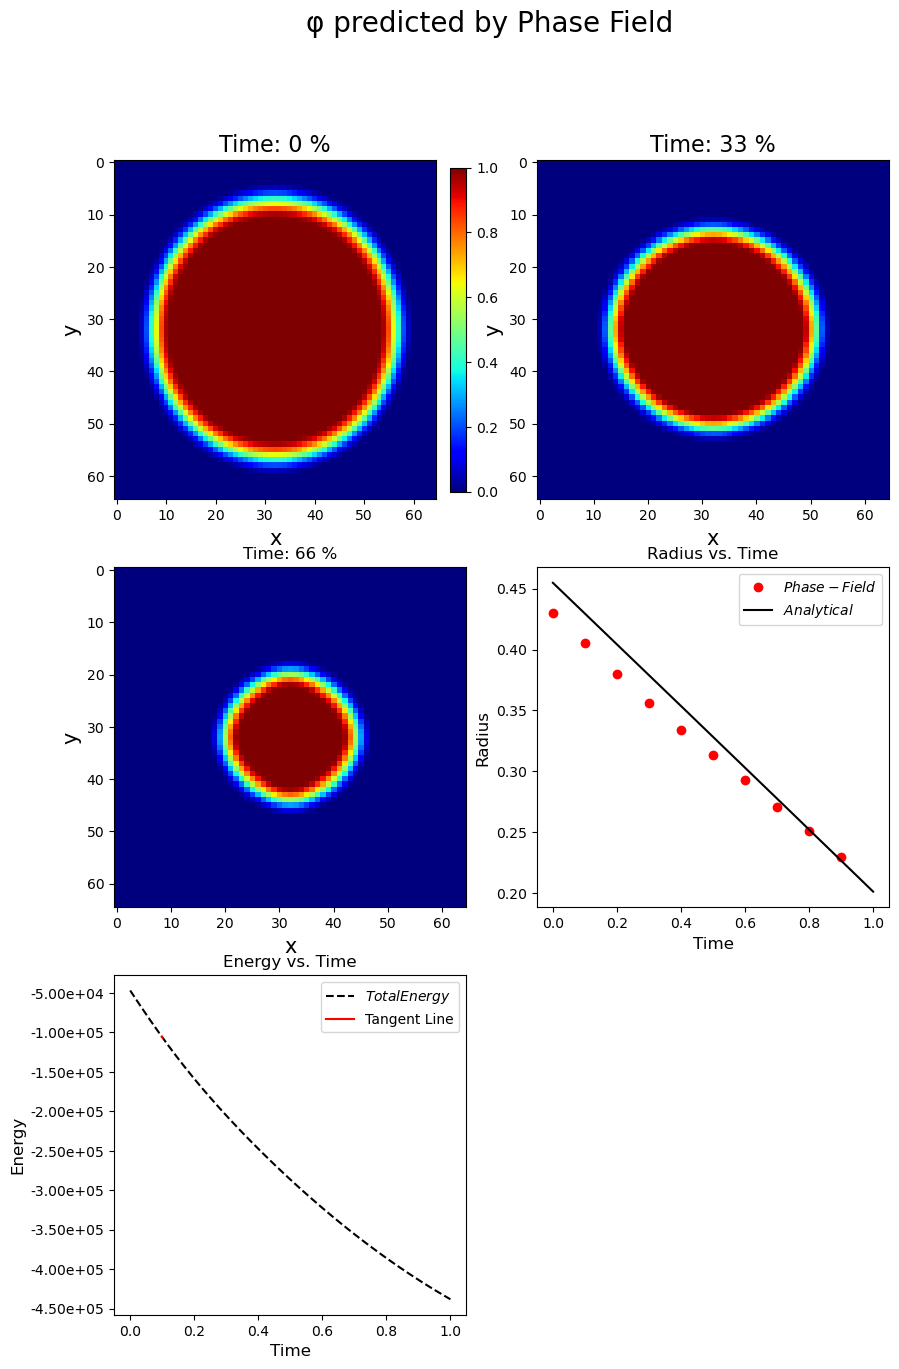

In [43]:
import matplotlib.ticker as ticker
# Initialize array for R values
R = np.zeros(Nt)

# Set initial condition
R[0] = R0+eta/2


   
# Finite difference scheme
for n in range(Nt-1):
    R[n+1] = R[n] + dt *mu * (-sigma / R[n] + delta_g)

# Plotting
#t = np.linspace(0,#, Nt)

raduis_FD=R

# Extract the area and time data from the out_area_vs_t list of lists
time = np.transpose(out_area_vs_t)[0]
area_area = np.transpose(out_area_vs_t)[1]
tot_energy=np.asarray(out_energy)


fig, ax = plt.subplots(3, 2, figsize=(10, 15))  # Adjust the figsize as needed
fig.subplots_adjust(hspace=0.2, wspace=0.2)  # Adjust the spacing between subplots
title = "φ predicted by Phase Field"
fig.suptitle(title, fontsize=20)



# Plot phi at regular intervals
im = ax[0,0].imshow(out_phi_vs_t[0][1], cmap=plt.get_cmap('jet'), interpolation='none', vmin=0, vmax=1,aspect='auto')
ax[0,0].set_xlabel("x",fontsize = 15)
ax[0,0].set_ylabel("y",fontsize = 15)
ax[0,0].set_xlabel('x')
ax[0,0].set_ylabel('y')
ax[0,0].set_title(f'Time: {0} %', fontsize=16)

im = ax[0,1].imshow(out_phi_vs_t[4][1], cmap=plt.get_cmap('jet'), interpolation='none', vmin=0, vmax=1,aspect='auto')
plt.colorbar(im,ax=ax[0,0],fraction=0.046, pad=0.04)
ax[0,1].set_xlabel("x",fontsize = 15)
ax[0,1].set_ylabel("y",fontsize = 15)
ax[0,1].set_xlabel('x')
ax[0,1].set_ylabel('y')
ax[0,1].set_title(f'Time: {33} %', fontsize=16)

im = ax[1,0].imshow(out_phi_vs_t[9][1], cmap=plt.get_cmap('jet'), interpolation='none', vmin=0, vmax=1,aspect='auto')
ax[1,0].set_xlabel("x",fontsize = 15)
ax[1,0].set_ylabel("y",fontsize = 15)
ax[1,0].set_xlabel('x')
ax[1,0].set_ylabel('y')
ax[1,0].set_title(f'Time: {66} %', fontsize=12)

# Plot Radius vs time
ax[1, 1].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax[1, 1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax[1,1].plot(np.transpose(out_area_vs_t)[0],np.sqrt(area_area/Nx**2/np.pi),"r",label=r"$Phase-Field$",linestyle=' ',marker='o')
ax[1,1].plot(np.linspace(0,1,len(raduis_FD)),raduis_FD, "black",label=r"$Analytical$")
ax[1,1].set_xlabel("Time",fontsize = 12)
ax[1,1].set_ylabel("Radius",fontsize = 12)
ax[1,1].set_title('Radius vs. Time', fontsize=12)
ax[1,1].legend()


# plot the enery evolution
ax[2,0].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax[2, 0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e'))
ax[2,0].plot(out_time,tot_energy[:,0] ,"k",label=r"$Total Energy $",linestyle='--')
#ax[2,0].plot(area_time,tot_energy[:,1] ,"b",label=r"$Curvature-driven$",linestyle='--')
#ax[2,0].plot(tot_energy[:,2] ,"r",label=r"$Driving-force$",linestyle='--')
xx = out_time  # x-coordinates for spline interpolation
yy = tot_energy[:, 0]  # y-coordinates for spline interpolation
# Generate smooth spline curve
spl_ = make_interp_spline(xx, yy)
#ax[2,0].plot(xx, spl(xx), "g", label="Spline Curve")

# Plot tangent line at the specified time (for check)

time=0.1
derivative = spl_.derivative(nu=1)(time)
tangent_x = np.array([time-dt, time+dt])  # X-coordinates for tangent line
tangent_y = spl(time) + derivative * (tangent_x - time)  # Y-coordinates for tangent line
ax[2,0].plot(tangent_x, tangent_y, "r", label="Tangent Line")
#print("derivative",derivative)

ax[2,0].set_xlabel("Time",fontsize = 12)
ax[2,0].set_ylabel("Energy",fontsize = 12)
ax[2,0].set_title('Energy vs. Time', fontsize=12)
ax[2,0].legend()



fig.delaxes(ax[2, 1])


#filename = f"phi_pred_epoch_{epoch+1} - t_min: {t_min:.3f}, t_max: {t_max:.3f}.jpg"
pathOutput = os.path.join(os.getcwd(),'save_figs')
#plt.savefig(os.path.join(pathOutput ,title))

#### Theoretical solution 

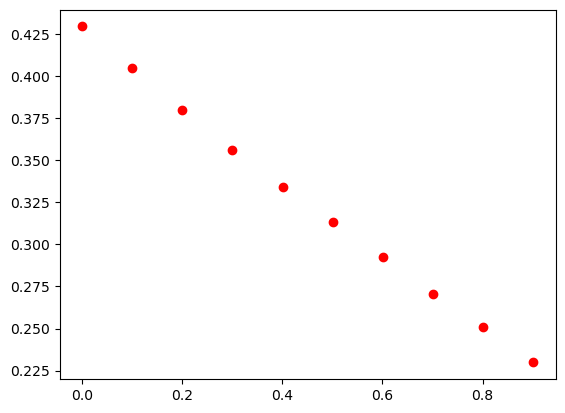

In [44]:
plt.plot(np.transpose(out_area_vs_t)[0],np.sqrt(area_area/Nx**2/np.pi),"r",label=r"$Phase-Field$",linestyle=' ',marker='o')

In [40]:
R0+eta/2

array([0.4453125])

In [38]:
import pickle

# Your data
data_to_save = {
    'out_time': np.transpose(out_area_vs_t)[0],
    'out_radius_vs_t': np.sqrt(area_area/Nx**2/np.pi),
}

# Save the data to a file
with open('PF.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)

Text(0, 0.5, 'R')

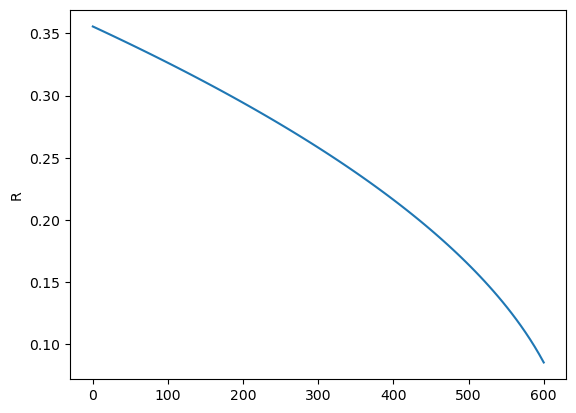

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
Nx=64
Ny=64
Nt=100



# simulation grid
lb = np.array([0, 0,0])
ub = np.array([1, 1,600]) 
x = np.linspace(lb[0], ub[0], Nx)
y = np.linspace(lb[1], ub[1], Ny)
t= np.linspace(lb[2], ub[2], Nt)
dx = (ub[0] - lb[0]) / (Nx - 1)
dy = (ub[1] - lb[1]) / (Ny - 1)
dt = (ub[2] - lb[2]) / (Nt- 1)


sigma=10
mu=1e-5
delta_g= 0
eta=7*dx

# Initialize array for R values
R = np.zeros(Nt)

# Set initial condition
R0=np.array([0.3])  #  radius 
R[0] = R0+eta/2


# Finite difference scheme
for n in range(Nt-1):
    R[n+1] = R[n] + dt  * mu* (-(sigma) / R[n] + delta_g)

# Plotting
t = np.linspace(0, ub[2], Nt)

plt.figure()
plt.plot(t, R)
#plt.xlim([0,1])
plt.ylabel('R')


In [349]:
FD_data=R
import pickle

with open('plot_data_FD.pickle', 'wb') as f:
    pickle.dump(FD_data, f)


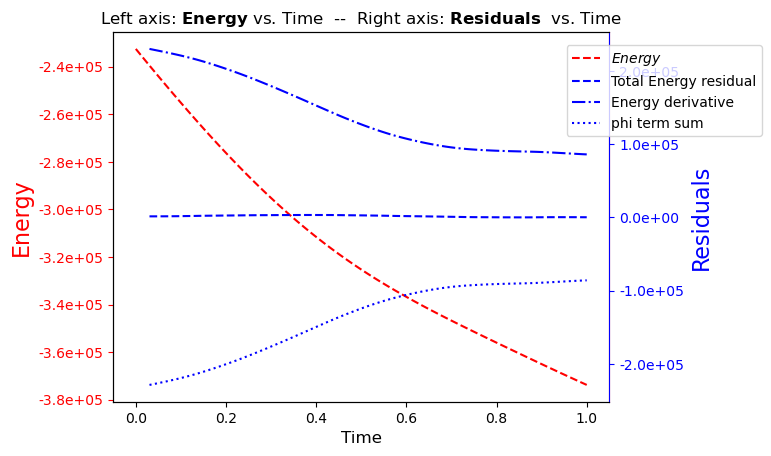

In [350]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

tot_energy = np.asarray(out_energy)
x = out_time  # x-coordinates for spline interpolation
y = tot_energy[:, 0]  # y-coordinates for spline interpolation

# Generate smooth spline curve
spl = make_interp_spline(x, y)

# Calculate derivative at a specific time
time = 0.25  # Example time value
derivative = spl.derivative(nu=1)(time)

# Create figure and axes
fig, ax1 = plt.subplots()
ax1.spines['right'].set_color('red')
ax1.tick_params(axis='y', colors='red')


# Plot the spline curve
ax1.plot(x, y, "r", label=r"$Energy $", linestyle='--')

# Set the first y-axis label
ax1.set_ylabel("Energy", fontsize=16, color="r")

# Create a second y-axis
ax2 = ax1.twinx()
ax2.spines['right'].set_color('blue')
ax2.tick_params(axis='y', colors='blue')


# Plot the second y-axis data
ax2.plot(out_time[3:], np.asarray(out_res)[:, 0], "b--", label="Total Energy residual")
ax2.plot(out_time[3:], -np.asarray(out_res)[:, 1], "b-.", label="Energy derivative")
ax2.plot(out_time[3:], np.asarray(out_res)[:, 2], "b:", label="phi term sum")

# Set the second y-axis label
ax2.set_ylabel("Residuals", fontsize=16, color="b")

# Set the x-axis label and title
ax1.set_xlabel("Time", fontsize=12)
ax1.set_title('Left axis: ' + r"$\bf{Energy}$" + ' vs. Time  --  Right axis: ' + r"$\bf{Residuals}$" + '  vs. Time', fontsize=12)

# Combine the legend from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(lines + lines2, labels + labels2, bbox_to_anchor=(0.9, 0.7), fontsize=10)


# Format y-axis
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))

# Show the plot
plt.show()


In [34]:
print("GPU available:", tf.config.list_physical_devices("GPU"))


GPU available: []


2023-06-13 15:17:28.013801: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-13 15:17:28.013942: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-13 15:17:28.013978: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-06-13 15:17:28.014005: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-06-13 15:17:28.014030: W tensorflow/c

Non-dimensional time:
$\tau^* = \frac{t}{T}$


Non-dimensional spatial coordinate:
$x^* = \frac{x}{\eta}$


Non-dimensional temporal derivative $\dot{\phi}^* = \frac{\dot{\phi}}{T}$


Dimensionless gradient in one spatial dimension:
$\nabla^* = \frac{1}{\eta}\frac{\partial}{\partial x}\mathbf{i}$


$T = \frac{\eta ^{2}}{\mu  \sigma }$

$\dot{\phi}^* = \mu \left[ \sigma \left( \nabla^{*2} \phi + \frac{\pi^2}{2 \eta ^{2}} (2\phi - 1) \right) \right] . T
$

$\dot{\phi}^* = \left[  \left( \nabla^{*2} \phi + \pi^2 (2\phi - 1) \right) \right] 
$

$\dot{ \phi}=\mu \left[ \sigma\left(\nabla^2 \phi+\frac{\pi^2}{2 \eta^2}(2\phi-1)\right) +h(\phi) \Delta g \right] $

In [13]:
import numpy as np
Nx=65
Ny=65
Nt=1500 # 500 if los_f
dx = 1e-6 
dy = dx 
# physical parameters
dt =1e-4  
sigma=0.24
mu=1e-8 # 1e-8 
delta_g= 0 
eta=7*dx




# Define the domain bounds
lb = np.array([0, 0,0])
ub = np.array([Nx*dx, Ny*dy,Nt*dt]) 

x = np.linspace(lb[0], ub[0], Nx)
y = np.linspace(lb[1], ub[1], Ny)
t= np.linspace(lb[2], ub[2], Nt) 


In [14]:
T=eta**2 /(sigma*mu)
x=x/eta
y=y/eta
t=t/T 
dt =dt /T 
dx=dx/eta
dy=dy/eta
delta_g=mu*T*delta_g

In [16]:
dt *Nt

7.346938775510205